<a href="https://colab.research.google.com/github/guillermohenrion/Intro-Python/blob/master/Exploraci%C3%B3n_con_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#rom google.colab import files
#uploaded=files.upload()

In [124]:
import pandas as pd

df_covid = pd.read_csv('time_series_covid19_confirmed_global.csv')
df_covid.head()
df_covid_Argentina=df_covid[df_covid['Country/Region']=='Argentina']
df_covid=df_covid.drop(['Province/State',	'Lat',	'Long'], axis=1)
df_covid_t=df_covid.transpose()
df_covid_t.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Canada,Canada,Canada,Canada,...,Uruguay,US,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,Canada,Dominica,Grenada,Mozambique,Syria,Timor-Leste,Belize,Canada,Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,Canada,Canada,Kosovo,Burma,United Kingdom,United Kingdom,United Kingdom,MS Zaandam,Botswana,Burundi,Sierra Leone,Netherlands,Malawi,United Kingdom,France,South Sudan,Western Sahara,Sao Tome and Principe,Yemen
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [126]:
df_covid_t.head()
df_covid_t[:1].transpose()
cols=df_covid_t[:1].transpose()
cols=cols['Country/Region']
df_covid_t.columns=cols
df_covid_t


Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Canada,Canada,Canada,Canada,...,Uruguay,US,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,Canada,Dominica,Grenada,Mozambique,Syria,Timor-Leste,Belize,Canada,Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,Canada,Canada,Kosovo,Burma,United Kingdom,United Kingdom,United Kingdom,MS Zaandam,Botswana,Burundi,Sierra Leone,Netherlands,Malawi,United Kingdom,France,South Sudan,Western Sahara,Sao Tome and Principe,Yemen
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Canada,Canada,Canada,Canada,...,Uruguay,US,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,Canada,Dominica,Grenada,Mozambique,Syria,Timor-Leste,Belize,Canada,Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,Canada,Canada,Kosovo,Burma,United Kingdom,United Kingdom,United Kingdom,MS Zaandam,Botswana,Burundi,Sierra Leone,Netherlands,Malawi,United Kingdom,France,South Sudan,Western Sahara,Sao Tome and Principe,Yemen
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/20/20,1026,584,2718,717,24,23,2941,1339,104,2963,28,1019,435,200,1329,545,14795,1436,60,1907,2948,75,6264,39983,54,5,564,1309,40743,138,929,581,67,122,1163,2908,1647,13,254,118,...,535,784326,1627,256,268,65,25,-1,16,14,39,39,22,18,0,19,51,449,50,246,15,5,11,510,119,3,5,11,9,20,5,43,5,17,11,1,4,6,4,1
4/21/20,1092,609,2811,717,24,23,3031,1401,104,2969,28,1024,437,201,1336,546,14873,1480,65,1973,3382,75,6723,40956,54,6,598,1342,43079,138,975,600,68,122,1163,3095,1724,13,255,118,...,535,811865,1678,285,268,70,28,-1,16,14,39,42,23,18,0,19,51,466,50,258,15,5,11,510,121,3,5,11,9,20,5,50,5,18,11,1,4,6,4,1
4/22/20,1176,634,2910,723,25,24,3144,1473,104,2971,28,1024,438,205,1336,546,14925,1518,65,2027,3772,75,7281,41889,54,6,609,1368,45757,138,1024,609,73,122,1163,3401,1795,-1,257,118,...,543,840351,1716,288,268,74,28,-1,16,15,41,42,23,18,0,19,59,474,50,293,15,5,11,510,123,3,5,11,9,22,11,61,5,23,11,1,4,6,4,1
4/23/20,1279,663,3007,723,25,24,3435,1523,104,2976,28,1026,438,207,1337,546,15002,1548,72,2217,4186,76,8022,42797,54,7,703,1413,50036,138,1097,616,82,122,1334,3720,1824,-1,262,118,...,557,869170,1758,311,268,76,28,0,16,15,46,42,23,18,0,19,60,480,50,309,15,5,11,510,139,3,5,11,9,22,11,64,5,33,12,1,5,6,4,1


In [0]:
cols

In [0]:
df_covid_t.head()
df_covid_t0=df_covid_t[1:]

df_covid_t0_Argentina=df_covid_t0["Argentina"]
df_covid_t0_Argentina=df_covid_t0_Argentina[df_covid_t0_Argentina>0]

df_covid_t0_Italia=df_covid_t0["Italy"]
df_covid_t0_Italia=df_covid_t0_Italia[df_covid_t0_Italia>0]

cnt_I=df_covid_t0_Italia.count()
cnt_A=df_covid_t0_Argentina.count()
I=[0]*cnt_I
A=[0]*cnt_A


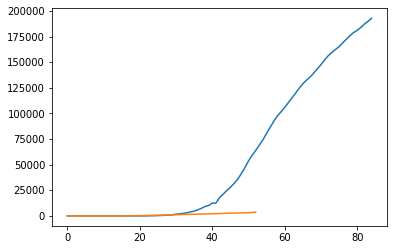

In [220]:
import matplotlib.pyplot as plt

plt.plot(df_covid_t0_Italia.to_list())
plt.plot(df_covid_t0_Argentina.to_list())

